In [1]:
from skyfield.api import load, wgs84, EarthSatellite, Topos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
satellites = load.tle_file('../data/tle/STARLINK.txt')
# satellites = load.tle_file('../data/tle/stations.txt')
print('Loaded', len(satellites), 'satellites')
ts = load.timescale()
planets = load('de421.bsp')
earth = planets['earth']


Loaded 331 satellites


In [3]:

ts = load.timescale()
for satellite in satellites:
  print(satellite)
  geocentric = satellite.at(satellite.epoch)  # ITRS \sim J2000
  print(geocentric.position.km)
  print(geocentric.velocity.km_per_s)
  print()


catalog #44713 epoch 2023-01-01 07:59:40 UTC
[6842.65922523 1065.21973044  -15.1820108 ]
[-0.69553068  4.50499941  6.06921878]

catalog #44713 epoch 2023-01-01 17:32:55 UTC
[6872.56310711  851.26709244  -15.24879952]
[-0.55467916  4.52493843  6.0688869 ]

catalog #44713 epoch 2023-01-02 09:28:18 UTC
[6907.5009385   493.11035318  -15.30847414]
[-0.31888315  4.54838857  6.06829814]

catalog #44713 epoch 2023-01-02 09:28:18 UTC
[6907.5009385   493.11035318  -15.30847414]
[-0.31888315  4.54838857  6.06829814]

catalog #44713 epoch 2023-01-02 17:25:59 UTC
[6917.89619785  313.45546803  -15.33192877]
[-0.20058678  4.55545011  6.06816264]

catalog #44713 epoch 2023-01-02 17:25:59 UTC
[6917.89619785  313.45546803  -15.33192877]
[-0.20058678  4.55545011  6.06816264]

catalog #44713 epoch 2023-01-03 06:10:19 UTC
[6925.0184233    25.57069015  -15.33464013]
[-0.01098803  4.5603776   6.06770067]

catalog #44713 epoch 2023-01-03 09:21:23 UTC
[6924.99079815  -46.50681773  -15.33941131]
[0.03641046 4.5

In [4]:
# print(f"Satellite Name: {satellite.name}")
# print(f"Epoch Time: {satellite.epoch.utc_jpl()}")
# print(f"Epoch Time (year): {satellite.model.epochyr:.16f}")
# print(f"Epoch Time (days): {satellite.model.epochdays:.16f}")
# print(f"Epoch Time (in jd): {satellite.model.jdsatepoch:.16f}")
# print(f"Epoch Time (in jd, ut1): {satellite.epoch.ut1:.16f}")
# print(f"Epoch Time (in jd, tt): {satellite.epoch.tt:.16f}")
# #print(f"Epoch Time (in jd, gmst): {satellite.epoch.gmst:.16f}")
# print(f"Inclination: {satellite.model.inclo:.16f} rad")
# print(
#     f"Right Ascension of Ascending Node: {satellite.model.nodeo:.16f} rad")
# print(f"Eccentricity: {satellite.model.ecco:.16f}")
# print(
#     f"Argument of Periapsis: {satellite.model.argpo:.16f} rad")
# print(f"Mean Anomaly: {satellite.model.mo:.16f} rad")
# print(f"Mean Motion: {satellite.model.no_kozai/60:.16f} rad/sec")


In [8]:
ts = load.timescale()
g_int = satellite.at(satellite.epoch)
# for i in range(0,1):
# # for i in range(len(satellites)):
#   t = ts.tt_jd(
#       np.arange(
#           satellites[i].epoch.tt,
#           satellites[i].epoch.tt+0.06,
#           0.001)) 
#   for time in t:
#     print(time)
#   g = satellite.at(t)

# we add the data (time, error) in a numpy array
T0 = satellites[0].epoch.tt
time = np.array([])
error = np.array([])
for satellite in satellites:
  r = satellites[0].at(satellite.epoch).position.km
  print(satellite.at(satellite.epoch).position.km)
  # print(satellite.at(satellite.epoch).position.m)
  # print(np.linalg.norm(r))
  er = np.linalg.norm(r - satellite.at(satellite.epoch).position.km)
  time = np.append(time, satellite.epoch.tt - T0)
  error = np.append(error, er)
  # print("Integrated satelite: "+ r)
  # print("TLE satelite: "+ satellite.at(T).position.m)
  # print(satellite.at(satellite.epoch).position.m)
  # error = np.linalg.norm(r - satellite.at(T).position.m)
# Compute geocentric positions for the satellite.


[6842.65922523 1065.21973044  -15.1820108 ]
[6872.56310711  851.26709244  -15.24879952]
[6907.5009385   493.11035318  -15.30847414]
[6907.5009385   493.11035318  -15.30847414]
[6917.89619785  313.45546803  -15.33192877]
[6917.89619785  313.45546803  -15.33192877]
[6925.0184233    25.57069015  -15.33464013]
[6924.99079815  -46.50681773  -15.33941131]
[6900.36042769 -585.98463944  -15.28006663]
[6869.96551436 -872.27894094  -15.19681964]
[ 6833.63302623 -1121.5685611    -15.1147489 ]
[ 6808.82414003 -1263.40590143   -15.06420208]
[ 6742.36888661 -1580.41519855   -14.90379698]
[ 6725.57178115 -1650.4571746    -14.86971929]
[ 6651.1232619  -1928.67287478   -14.69708308]
[ 6640.90750534 -1963.15866685   -14.66997002]
[ 6640.90750534 -1963.15866685   -14.66997002]
[ 6530.04430112 -2305.6002632    -14.42331572]
[ 6480.65042233 -2440.84896948   -14.31082238]
[ 6401.463394   -2642.04738435   -14.12624713]
[ 6401.463394   -2642.04738435   -14.12624713]
[ 6330.55629258 -2807.22098278   -13.965819

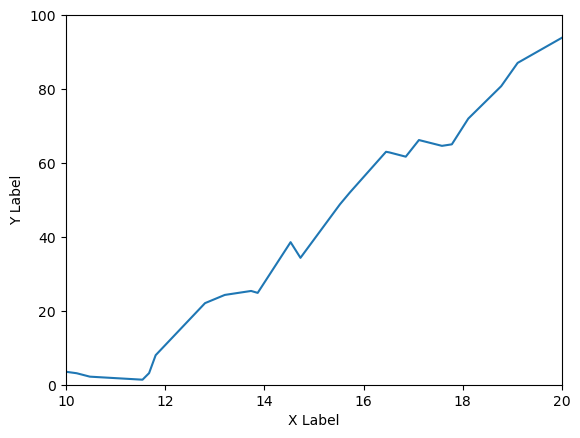

In [6]:
# ts = load.timescale()
# t = ts.tt_jd(np.arange(satellite.epoch.tt, satellite.epoch.tt + 0.06, 0.0005))

# # Compute geocentric positions for the satellite.

# g = satellite.at(t)
# valid = [m is None for m in g.message]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, error)
ax.set_ylim(0, 100)
ax.set_xlim(10, 20)
# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
# Show the plot
plt.show()


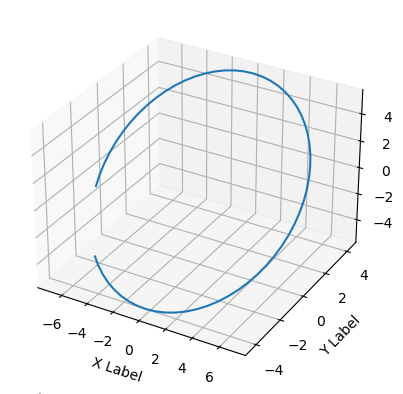

In [32]:
# Create sample data
data = g.position.m

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[0], data[1], data[2])

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [12]:
orbital_elements = satellite.at(satellite.epoch).to_icrs().frame_latlon(load.timescale())[-1]

# Convert the orbital elements to the perifocal reference frame
r_perifocal, v_perifocal = orbital_elements.to_perifocal()


AttributeError: 'Topos' object has no attribute 'perifocal'

In [8]:
ts = load.timescale()
t = ts.tt(2023, 3, 27, 4, 0)

print('TT date and time: ', t.tt_strftime())
print('TAI date and time:', t.tai_strftime())
print('UTC date and time:', t.utc_strftime())
print('TDB Julian date: {:.10f}'.format(t.tdb))
print('Julian century: {:.1f}'.format(t.J))


TT date and time:  2023-03-27 04:00:00 TT
TAI date and time: 2023-03-27 03:59:28 TAI
UTC date and time: 2023-03-27 03:58:51 UTC
TDB Julian date: 2460030.6666666856
Julian century: 2023.2


In [6]:
ts = load.timescale()
t = ts.utc(2014, 1, 23, 11, 18, 7)

geocentric = satellite.at(t)
print(geocentric.position.km)

lat, lon = wgs84.latlon_of(geocentric)
print('Latitude:', lat)
print('Longitude:', lon)
print('distance from earth center:', geocentric.distance().km, 'km')

[-1.80793098e+20  5.94625549e+19 -1.48671928e+20]
Latitude: -38deg 04' 18.9"
Longitude: -130deg 17' 20.3"
distance from earth center: 2.415062770180053e+20 km


In [7]:

print('TT date and time: ', t.tt_strftime())
print('TAI date and time:', t.tai_strftime())
print('UTC date and time:', t.utc_strftime())
print('TDB Julian date: {:.10f}'.format(t.tdb))
print('Julian century: {:.1f}'.format(t.J))


TT date and time:  2014-01-23 11:19:14 TT
TAI date and time: 2014-01-23 11:18:42 TAI
UTC date and time: 2014-01-23 11:18:07 UTC
TDB Julian date: 2456680.9716919512
Julian century: 2014.1
